In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.shape

(13200, 7)

In [5]:
# sns.histplot(df.price_per_sqft, kde=True)

# Using quantiles to remove outliers

In [6]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001,0.999])
min_threshold

1366.184

In [7]:
max_threshold

50959.36200000098

In [8]:
# Get the data with data only within this limits 
df2 = df[(df.price_per_sqft > min_threshold)  & (df.price_per_sqft < max_threshold)]
df2.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274


In [9]:
df2.shape

(13172, 7)

# Using z-score = data point - mean divide by std

In [10]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2

C:\Users\The Oyondi\AppData\Local\Temp\ipykernel_54356\948635581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [11]:
df2.zscore.describe()

count    1.317200e+04
mean    -9.952561e-17
std      1.000000e+00
min     -1.276172e+00
25%     -5.777932e-01
50%     -2.959787e-01
75%      1.563253e-01
max      1.054942e+01
Name: zscore, dtype: float64

In [12]:
#remove the outliers now with zscore of 4
df3 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df3.shape

(13047, 8)

In [13]:
df3.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247,-0.825075
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467,0.193997
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181,2.781282
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828,-0.443285
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888,-0.670283


In [14]:
import seaborn as sns

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

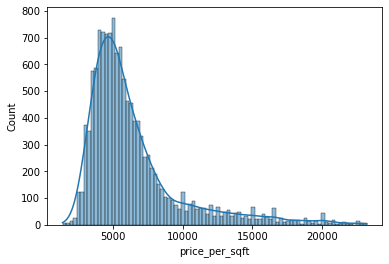

In [15]:
sns.histplot(df3.price_per_sqft, kde=True)

Better distribution achieved compared to initial distribution

# Using IQR

In [20]:
Q1 = df2.price_per_sqft.quantile(0.25)
Q3 = df2.price_per_sqft.quantile(0.75)

IQR = Q3-Q1
IQR

3040.0

In [21]:
lower_limit = df2.price_per_sqft - 1.5*IQR
upper_limit = df2.price_per_sqft + 1.5*IQR
lower_limit, lower_limit

(0        -861.0
 1          55.0
 2        -255.0
 3        1685.0
 4        -310.0
           ...  
 13195    2129.0
 13196    6551.0
 13197     698.0
 13198    5847.0
 13199   -1470.0
 Name: price_per_sqft, Length: 13172, dtype: float64,
 0        -861.0
 1          55.0
 2        -255.0
 3        1685.0
 4        -310.0
           ...  
 13195    2129.0
 13196    6551.0
 13197     698.0
 13198    5847.0
 13199   -1470.0
 Name: price_per_sqft, Length: 13172, dtype: float64)

In [23]:
df_no_outliers = df2[(df2.price_per_sqft > lower_limit) & (df2.price_per_sqft < upper_limit)]
df_no_outliers.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

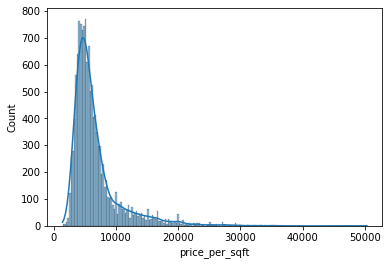

In [24]:
sns.histplot(df_no_outliers.price_per_sqft, kde=True)

In [25]:
df_no_outliers.isna().sum() 

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
zscore            0
dtype: int64